In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Fake negative log likelihood function for illustration
beta_true = 5
m = beta_true
s = 0.7
def neg_log_likelihood(beta):
    return ((beta - m) / s) ** 2
def grad_neg_log_likelihood(beta):
    return 2 * ((beta - m) / s) * (1 / s)

In [6]:
# Function to plot the steps of gradient descent
def plot_steps(step_size, max_iter=10, ax=None):
    if ax is None:
        ax = plt.gca()
    # Initialization
    beta_hat = 1.1 # An arbitrary starting value
    beta_hat_arr = [beta_hat]
    nll_hat_arr = [neg_log_likelihood(beta_hat)]

    # Gradient descent iterations
    for it in range(max_iter):
        beta_hat = beta_hat - step_size * grad_neg_log_likelihood(beta_hat)

        # Save estimates for visualization
        beta_hat_arr.append(beta_hat)
        nll_hat_arr.append(neg_log_likelihood(beta_hat))

    vis_arr = np.linspace(np.minimum(np.min(beta_hat_arr), beta_true), np.maximum(np.max(beta_hat_arr), beta_true))
    ax.plot(vis_arr, [neg_log_likelihood(beta) for beta in vis_arr], label='Neg. Log likelihood') 
    ax.plot(beta_hat_arr, nll_hat_arr, 'o-', label='Gradient steps')
    ax.plot(np.ones(2)*beta_true, ax.get_ylim(), label='True value')
    ax.set_title(f'step_size={step_size}')
    ax.legend()

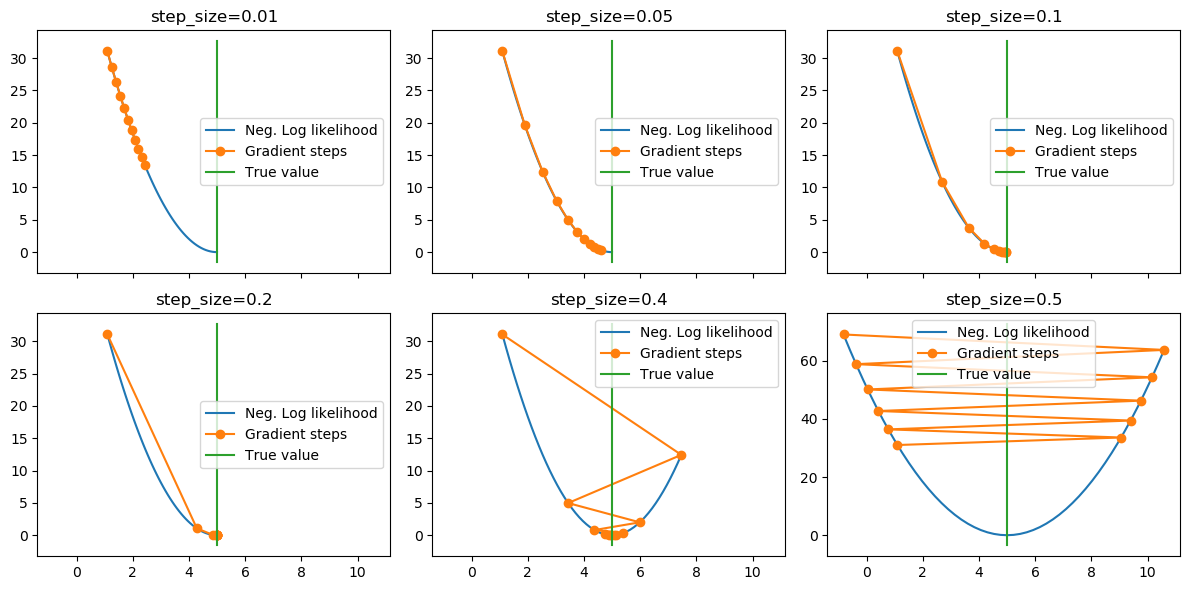

In [7]:
# 0.01 (slow), 0.05 (decent), 0.1 (better), 
# 0.2 (best) 0.4 (overshoots), 0.5 (diverges)
step_size_arr = [0.01, 0.05, 0.1, 0.2, 0.4, 0.5]
fig, axes = plt.subplots(2, 3, figsize=(3*4, 2*3), dpi=100, sharex=True)
for step_size, ax in zip(step_size_arr, axes.ravel()):
    plot_steps(step_size, ax=ax)
plt.tight_layout()